In [ ]:
# Telomere Shortening Simulation with Oxidative Stress & Visualization
import matplotlib.pyplot as plt
import random

Hello


In [15]:
# User Inputs
import ipywidgets as widgets
from IPython.display import display

def get_stress_level(default=1.0):
    try:
      stress_slider = widgets.FloatSlider(
          value=default,
          min=0.5,
          max=5.0,
          step=0.1,
          description='Oxidative Stress:',
          continuous_update=False
      )
      display(stress_slider)
      return stress_slider
    except:
       print(f"Slider available. Using default stress level: {default}")
       return default

slider = get_stress_level()





FloatSlider(value=1.0, continuous_update=False, description='Oxidative Stress:', max=5.0, min=0.5)

In [22]:
# Obtain the stress value from the slider
stress_level = slider.value
print(stress_level)

# Initialize variables 
initial_telomere = 10000
critical_length = 4000
shortening_rate = 100 # base shortening per division
telomere_length = initial_telomere
divisions = 0
telomere_over_time = []

1.7


In [ ]:
# Simulation
while telomere_length > critical_length:
  telomere_over_time.append(telomere_length)
  telomere_length -= shortening_rate*stress_level
  divisions+=1

print(divisions)

telomere_over_time.append(telomere_length)

print(telomere_over_time)

# Results of Simulation
print(f"\nWith a stress level of {stress_level}, the cell can divide {divisions} times before senescence")
# Note that human somatic cells divide approximately 40 to 60 times before they stop dividing and enter a senescent state



36
[10000, 9830.0, 9660.0, 9490.0, 9320.0, 9150.0, 8980.0, 8810.0, 8640.0, 8470.0, 8300.0, 8130.0, 7960.0, 7790.0, 7620.0, 7450.0, 7280.0, 7110.0, 6940.0, 6770.0, 6600.0, 6430.0, 6260.0, 6090.0, 5920.0, 5750.0, 5580.0, 5410.0, 5240.0, 5070.0, 4900.0, 4730.0, 4560.0, 4390.0, 4220.0, 4050.0, 3880.0, 3880.0]

With a stress level of 1.7, the cell can divide 36 times before senescence


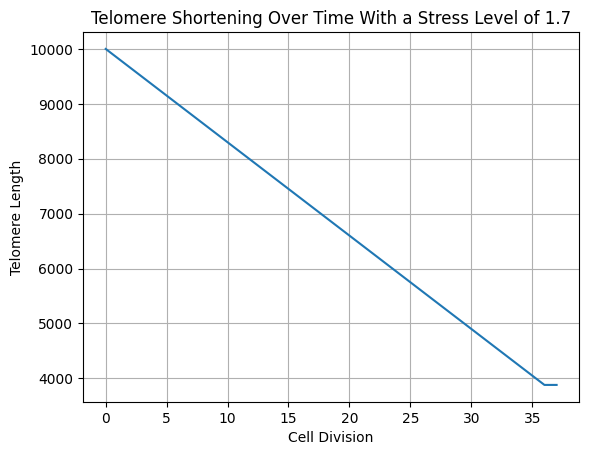

In [27]:
# Plotting the graph of Telomere Length against Cell Divisions
plt.plot(telomere_over_time)
plt.title(f"Telomere Shortening Over Time With a Stress Level of {stress_level}")
plt.xlabel("Cell Division")
plt.ylabel("Telomere Length")
plt.grid(True)
plt.show()

In [ ]:
# Multi-Cell Aging Simulation